# Dashboard made with Dash


### Import the necessary libraries

- Pandas to create a data frame and store data
- Dash to create the Dasboard running with the Flask framework

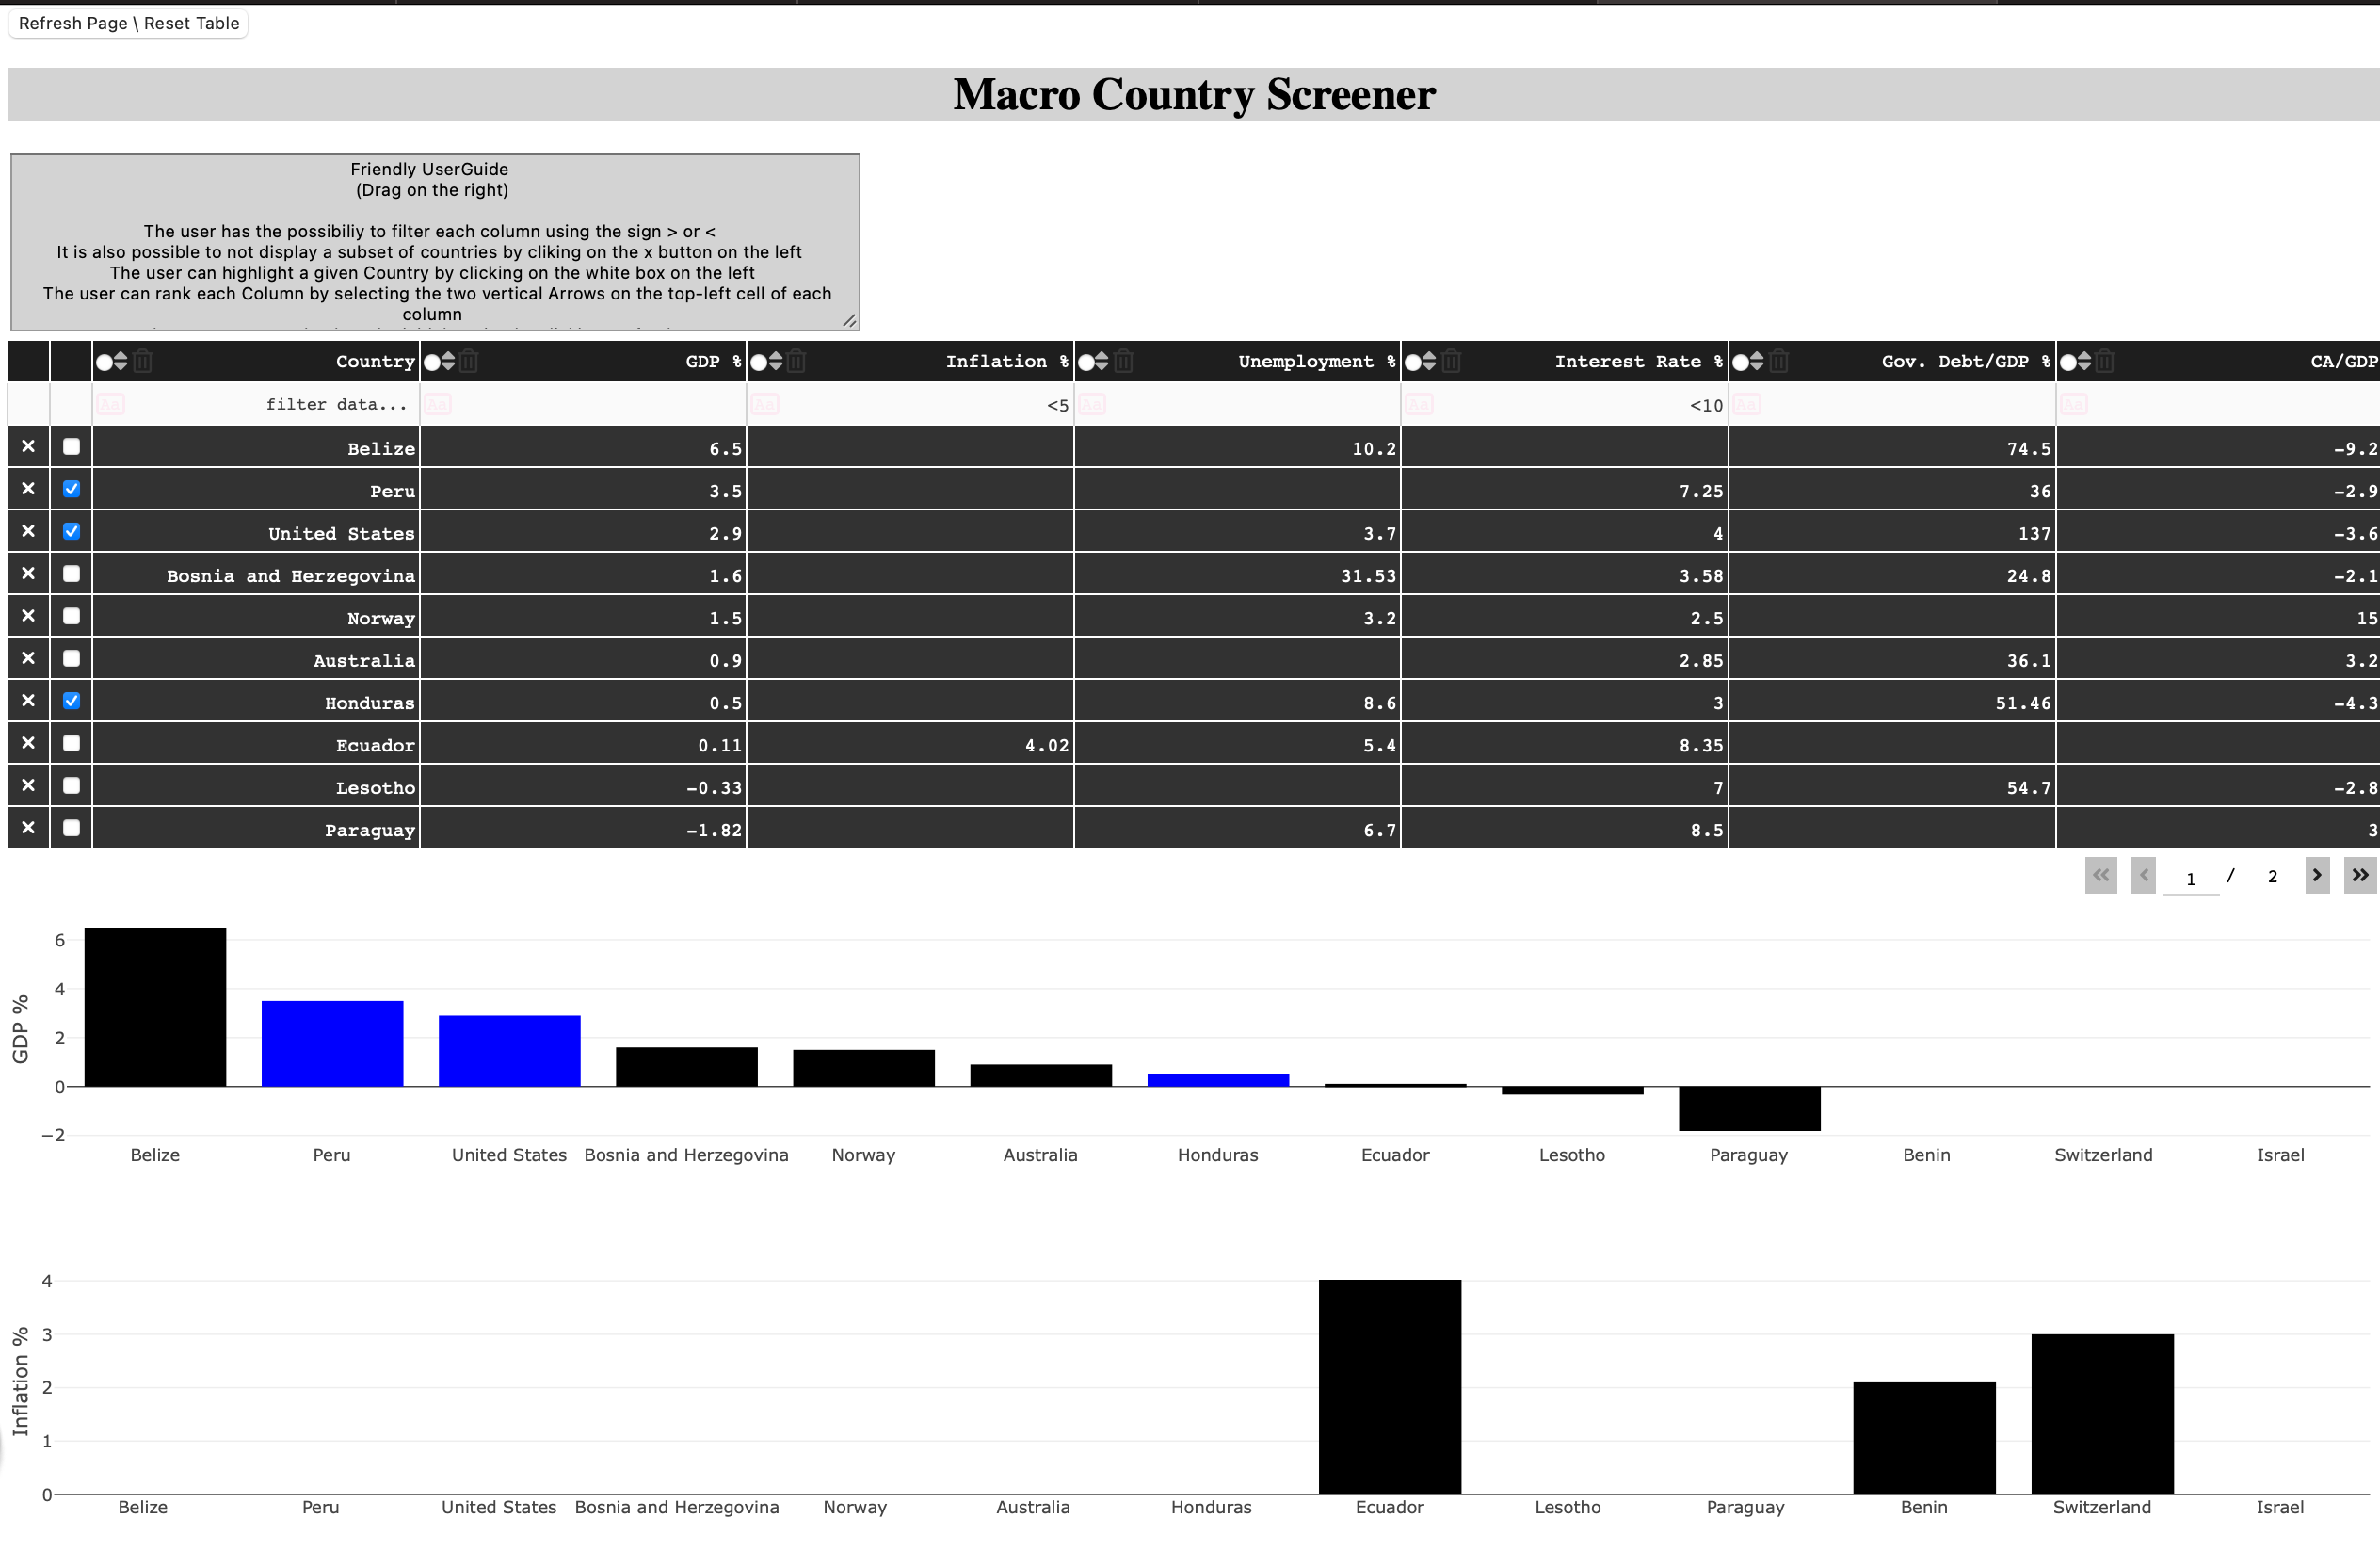

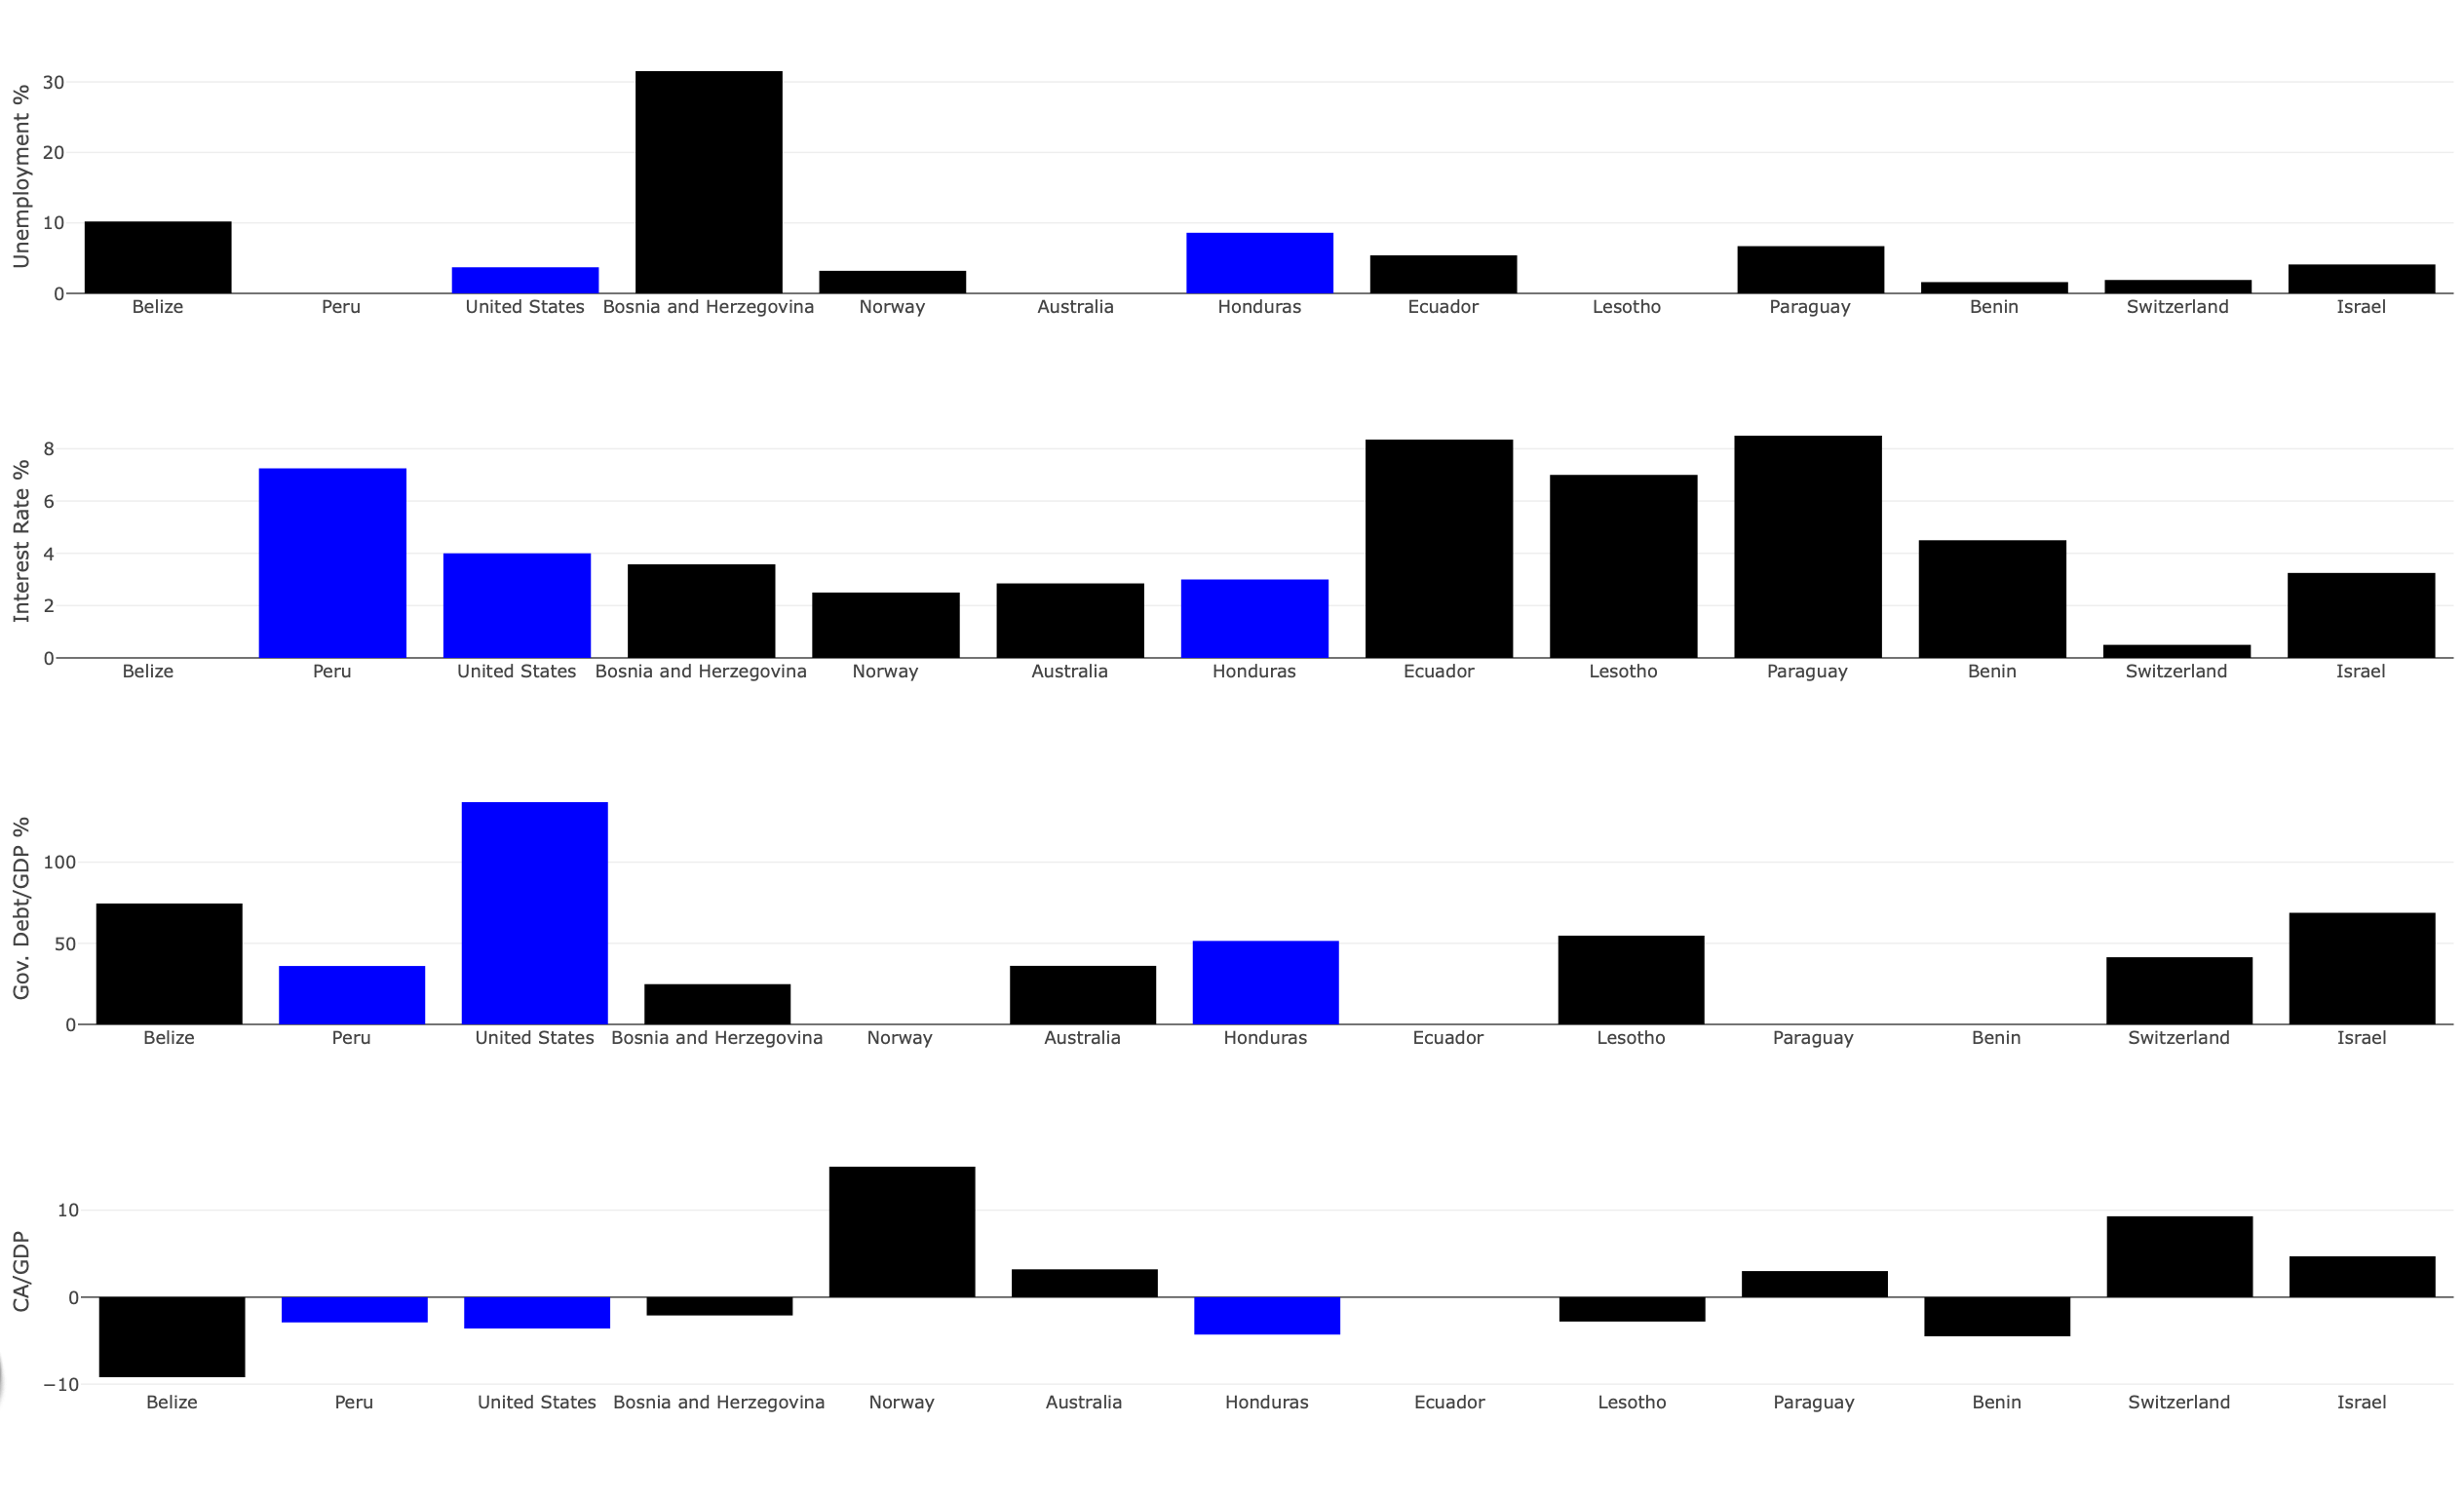

In [15]:
import pandas as pd
from dash import Dash, dash_table, dcc, html, dependencies
from dash.dependencies import Input, Output

import warnings
warnings.filterwarnings("ignore")

In [16]:
# Retrieve data from the CSV

df = pd.read_csv('CSV/all_data.csv')

In [17]:
# Drop countries with very few economic indicators

data = df.dropna(axis = 0, thresh=5).reset_index(drop=True)

data.head()

,Country,Last-gdp-growth-rate,Last-inflation-rate,Last-interest-rate,Last-unemployment-rate,Last-government-debt-to-gdp,Last-balance-of-trade,Last-current-account-to-gdp
0,Belize,6.50,NaN,2.25,10.2,74.5,-129592.0,-9.2
1,Bahrain,5.03,3.8,NaN,NaN,128.0,NaN,6.7
2,Peru,3.50,NaN,7.25,7.2,36.0,689.0,-2.9
3,United States,2.90,7.7,4.00,3.7,137.0,NaN,-3.6
4,Saudi Arabia,2.60,NaN,NaN,5.8,30.0,64613.0,NaN


In [18]:
# Replace the Column Labels to make it clearer

old_label = ['Country', 'Last-gdp-growth-rate', 
       'Last-inflation-rate', 
       'Last-unemployment-rate', 
       'Last-interest-rate', 
       'Last-government-debt-to-gdp',
       'Last-current-account-to-gdp']

new_label = ['Country', 'GDP %', 
       'Inflation %', 
       'Unemployment %', 
       'Interest Rate %', 
       'Gov. Debt/GDP %',
       'CA/GDP']

data.rename(columns = dict(zip(old_label, new_label)), inplace = True)

data = data[['Country', 'GDP %','Inflation %', 'Unemployment %',
             'Interest Rate %', 'Gov. Debt/GDP %','CA/GDP']]

data.head()

,Country,GDP %,Inflation %,Unemployment %,Interest Rate %,Gov. Debt/GDP %,CA/GDP
0,Belize,6.50,NaN,10.2,2.25,74.5,-9.2
1,Bahrain,5.03,3.8,NaN,NaN,128.0,6.7
2,Peru,3.50,NaN,7.2,7.25,36.0,-2.9
3,United States,2.90,7.7,3.7,4.00,137.0,-3.6
4,Saudi Arabia,2.60,NaN,5.8,NaN,30.0,NaN


In [19]:
# We rename the object

df = data

# Create the Dash APP

app = Dash(__name__)

app.layout = html.Div(children = [
        
        html.A(html.Button('Refresh Page \ Reset Table'),href='/'),
    
        html.H1(children='Macro Country Screener', 
                style={'color':'black','text-align':'center', 'backgroundColor':'lightgray'}),

        html.Div([dcc.Textarea(value='Friendly UserGuide  \n(Drag on the right) \n\nThe user has the possibiliy to filter each column using the sign > or <  \nIt is also possible to not display a subset of countries by cliking on the x button on the left  \nThe user can highlight a given Country by clicking on the white box on the left \n The user can rank each Column by selecting the two vertical Arrows on the top-left cell of each column \nThe user can come back to the initial setting by clicking \'Refresh Page\'''',
                  
                 style={'color':'black','text-align':'center', 'backgroundColor':'lightgray'})]),
    
        dcc.Location(id='url', refresh=True),    
    
        dash_table.DataTable(
        id='datatable-interactivity',
        columns=[{"name": i, "id": i, "deletable": True, "selectable": True} for i in df.columns],
        data=df.to_dict('records'),
        editable=True,
        filter_action="native",
        sort_action="native",
        sort_mode="multi",
        column_selectable="single",
        row_selectable="multi",
        row_deletable=True,
        selected_columns=[],
        selected_rows=[],
        page_action="native",
        page_current= 0,
        page_size= 10,
        
        style_header={
        'backgroundColor': 'rgb(30, 30, 30)', 'alpha' : 0.9,
        'color': 'white', 'border': '1px solid white'},
        
        style_data={
        'backgroundColor': 'rgb(50, 50, 50)', 'alpha' : 0.5,
        'color': 'white', 'border': '1px solid white'},
 
    ),
    html.Div(id='datatable-interactivity-container')
])


# We create callback methods in order to make our dashboard interactive
# And we create functions to actualize the table and the graphs when we filter through our data

@app.callback(
    Output('datatable-interactivity', 'style_data_conditional'),
    Input('datatable-interactivity', 'selected_columns'))



def update_styles(selected_columns):
    return [{
        'if': { 'column_id': i },
        'background_color': '#D2F3FF'
    } for i in selected_columns]

@app.callback(
    Output('datatable-interactivity-container', "children"),
    Input('datatable-interactivity', "derived_virtual_data"),
    Input('datatable-interactivity', "derived_virtual_selected_rows"))


def update_graphs(rows, derived_virtual_selected_rows):
    if derived_virtual_selected_rows is None:
        derived_virtual_selected_rows = []

    dff = df if rows is None else pd.DataFrame(rows)

    colors = ['blue' if i in derived_virtual_selected_rows else 'black'
              for i in range(len(dff))]

    return [
        dcc.Graph(
            id=column,
            figure={
                "data": [
                    {
                        "x": dff["Country"],
                        "y": dff[column],
                        "type": "bar",
                        "marker": {"color": colors},
                    }
                ],
                "layout": {
                    "xaxis": {"automargin": True},
                    "yaxis": {
                        "automargin": True,
                        "title": {"text": column}
                    },
                    "height": 250,
                    "margin": {"t": 10, "l": 10, "r": 10},
                },
            },
        )

        for column in ['GDP %','Inflation %', 'Unemployment %', 'Interest Rate %', 
                       'Gov. Debt/GDP %','CA/GDP'] if column in dff
    ]

# We can run the Dash app by executing this cell

if __name__ == '__main__':
    app.run()

Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [06/Dec/2022 19:31:23] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2022 19:31:23] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2022 19:31:23] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2022 19:31:23] "GET /_dash-component-suites/dash/dash_table/async-highlight.js HTTP/1.1" 304 -
127.0.0.1 - - [06/Dec/2022 19:31:23] "GET /_dash-component-suites/dash/dash_table/async-table.js HTTP/1.1" 304 -
127.0.0.1 - - [06/Dec/2022 19:31:23] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2022 19:31:23] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2022 19:31:23] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 304 -
127.0.0.1 - - [06/Dec/2022 19:31:23] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 304 -
127.0.0.1 - - [06/Dec/2022 19:31:23] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [06/Dec/2022 19:31:27]